In [1]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.6 MB/s eta 0:00:00


In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pydicom
from pydicom import dcmread

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
!unzip gdrive/My\ Drive/DICOM.zip

Archive:  gdrive/My Drive/DICOM.zip
   creating: DICOM/
  inflating: DICOM/.DS_Store         
   creating: __MACOSX/
   creating: __MACOSX/DICOM/
  inflating: __MACOSX/DICOM/._.DS_Store  
   creating: DICOM/ST000000/
  inflating: DICOM/ST000000/.DS_Store  
   creating: __MACOSX/DICOM/ST000000/
  inflating: __MACOSX/DICOM/ST000000/._.DS_Store  
  inflating: DICOM/ST000000/ctkDICOM.sql  
  inflating: __MACOSX/DICOM/ST000000/._ctkDICOM.sql  
  inflating: DICOM/ST000000/ctkDICOMTagCache.sql  
  inflating: __MACOSX/DICOM/ST000000/._ctkDICOMTagCache.sql  
   creating: DICOM/ST000000/dicom/
  inflating: DICOM/ST000000/dicom/.DS_Store  
   creating: __MACOSX/DICOM/ST000000/dicom/
  inflating: __MACOSX/DICOM/ST000000/dicom/._.DS_Store  
   creating: DICOM/ST000000/dicom/1.2.840.113619.2.243.6074146108103184.41976.4343.2084088/
  inflating: DICOM/ST000000/dicom/1.2.840.113619.2.243.6074146108103184.41976.4343.2084088/.DS_Store  
   creating: __MACOSX/DICOM/ST000000/dicom/1.2.840.113619.2.243.607

# Sagital brain MRI

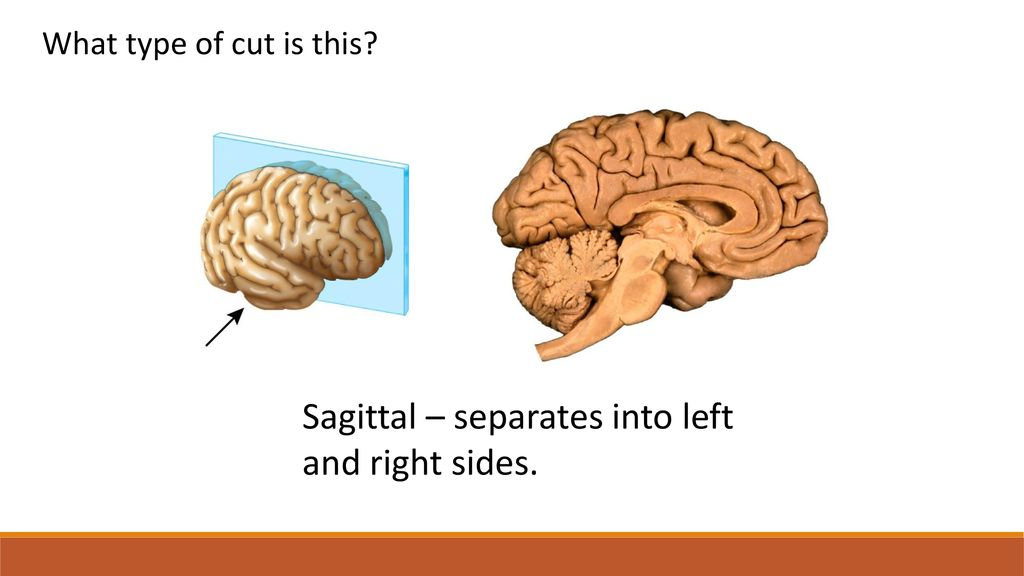

In [59]:
path_head_mri = Path("/content/DICOM/ST000000/SE000000/")

the list of the path of the mri images in the dicome file




In [60]:
all_files = list(path_head_mri.glob('*'))

In [61]:
all_files

[PosixPath('/content/DICOM/ST000000/SE000000/MR000003'),
 PosixPath('/content/DICOM/ST000000/SE000000/MR000000'),
 PosixPath('/content/DICOM/ST000000/SE000000/MR000004'),
 PosixPath('/content/DICOM/ST000000/SE000000/MR000001'),
 PosixPath('/content/DICOM/ST000000/SE000000/MR000002')]

In [62]:
mri_slices = []

for path in all_files:

  each_slice = dcmread(path)
  mri_slices.append(each_slice)

Now we want to check whether the MRI slices are ordered or not!
So, we check first 5 slices in the dicome file

In [63]:
for slice in mri_slices:

  print(slice.SliceLocation)

206.797699272813
0.0
174.041300962232
19.9999995267284
39.9999990534569


Obviously slices are not ordered, we have to sort them

In [64]:
mri_slice_ordered = sorted(mri_slices, key = lambda slice:slice.SliceLocation)

Now we have sorted MRI slices

In [65]:
for slice in mri_slice_ordered:

  print(slice.SliceLocation)

0.0
19.9999995267284
39.9999990534569
174.041300962232
206.797699272813


# displaying all the MRI slices (Sagital)

In [71]:
all_slices=[]

for slice in mri_slice_ordered:

  all_slices.append(slice.pixel_array)

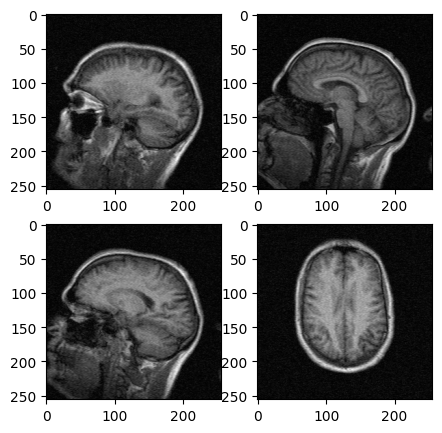

In [72]:
fig,axes= plt.subplots(2,2,figsize = (5,5))
slice_count = 0
for i in range(2):
  for j in range(2):
    axes[i][j].imshow(all_slices[slice_count], cmap="gray")
    slice_count +=1

# Axial Brain MRI

# 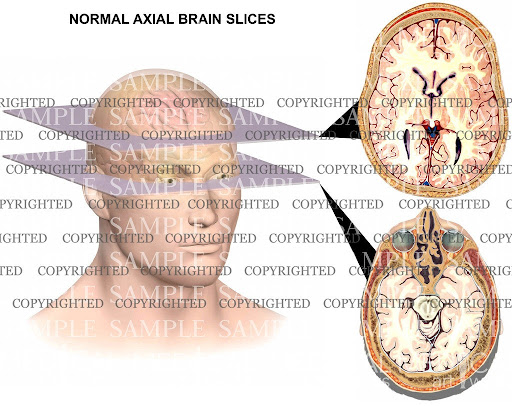

In [73]:
path_head_mri = Path("/content/DICOM/ST000000/SE000001/")

In [74]:
all_files = list(path_head_mri.glob('*'))

In [75]:
all_files

[PosixPath('/content/DICOM/ST000000/SE000001/MR000013'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000006'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000018'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000012'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000003'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000010'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000011'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000015'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000020'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000026'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000025'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000000'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000004'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000019'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000001'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000024'),
 PosixPath('/content/DICOM/ST000000/SE000001/MR000017'),
 PosixPath('/content/DICOM/ST00

In [76]:
mri_slices = []

for path in all_files:

  each_slice = dcmread(path)
  mri_slices.append(each_slice)

In [77]:
for slice in mri_slices:

  print(slice.SliceLocation)

77.9999962275740
35.9999959546749
107.999995419197
71.9999961590453
17.9999979772582
59.9999962290673
65.9999961939969
89.9999955528687
119.999996566542
155.999992554172
149.999999502083
0.0
23.9999946081714
113.999995959439
5.99999663091323
143.999998928727
101.999994745866
125.999997173645
53.9999958207213
41.9999963629367
137.999998321624
131.999997780749
47.9999970362677
29.9999952815023
95.9999960937442
83.9999967682912
11.9999973042441


In [78]:
mri_slice_ordered = sorted(mri_slices, key = lambda slice:slice.SliceLocation)

In [79]:
for slice in mri_slice_ordered:

  print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439
119.999996566542
125.999997173645
131.999997780749
137.999998321624
143.999998928727
149.999999502083
155.999992554172


In [80]:
all_slices=[]

for slice in mri_slice_ordered:

  all_slices.append(slice.pixel_array)

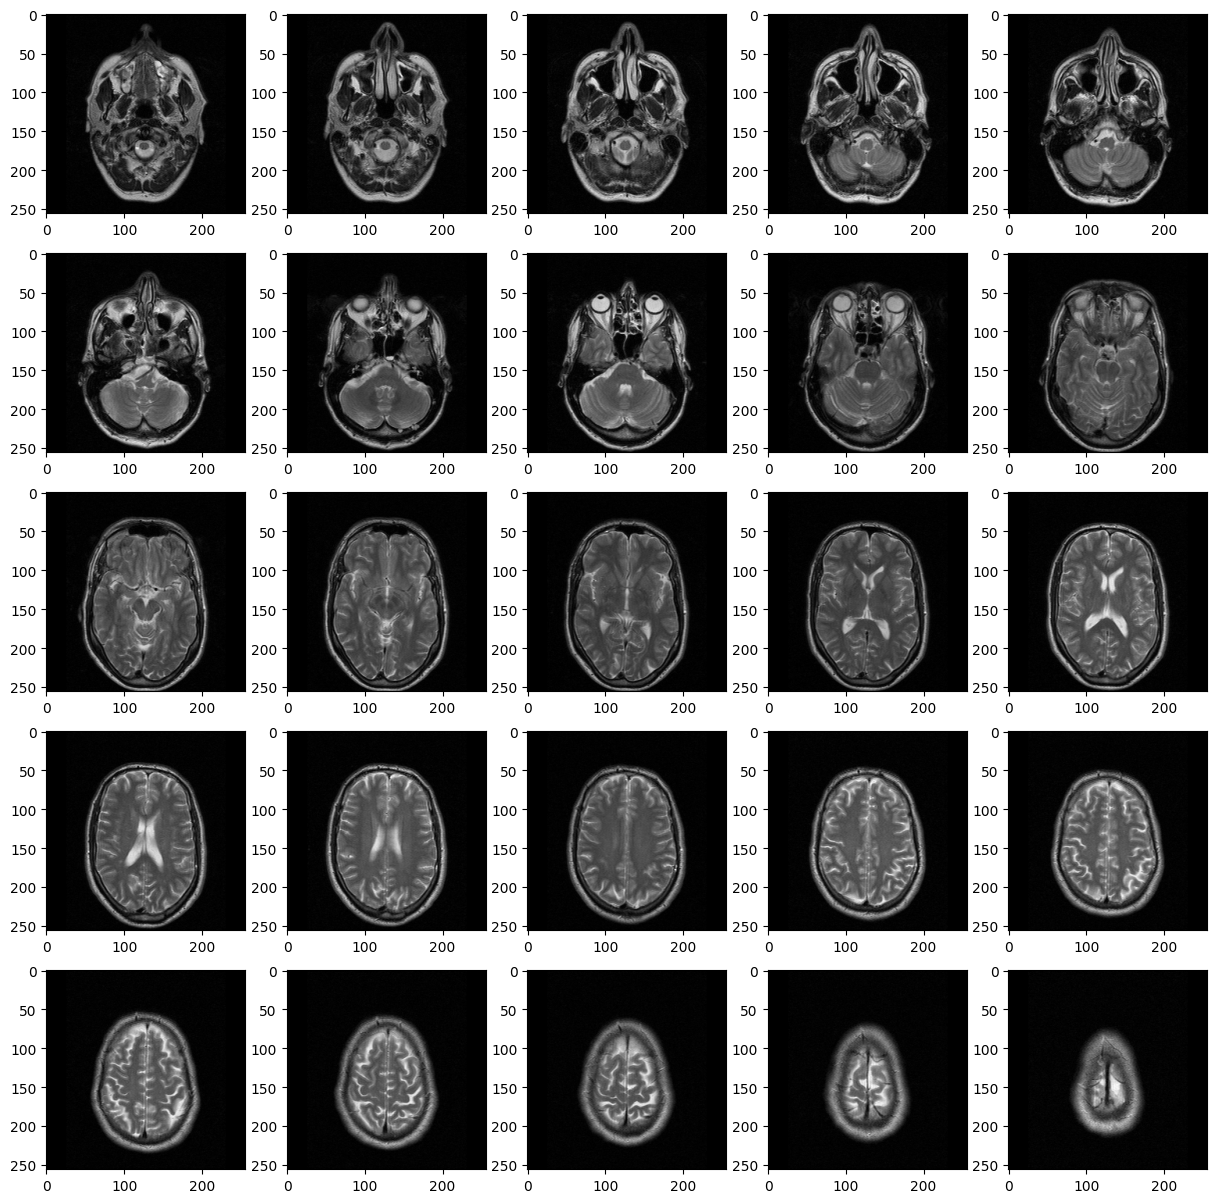

In [82]:
fig,axes= plt.subplots(5,5,figsize = (15,15))
slice_count = 0
for i in range(5):
  for j in range(5):
    axes[i][j].imshow(all_slices[slice_count], cmap="gray")
    slice_count +=1

# Coronal Brain MRI

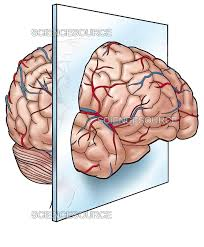

In [83]:
path_head_mri = Path("/content/DICOM/ST000000/SE000002/")

In [84]:
all_files = list(path_head_mri.glob('*'))

In [87]:
all_files

[PosixPath('/content/DICOM/ST000000/SE000002/MR000013'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000006'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000031'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000018'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000012'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000003'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000010'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000011'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000015'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000029'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000020'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000026'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000025'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000000'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000004'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000019'),
 PosixPath('/content/DICOM/ST000000/SE000002/MR000001'),
 PosixPath('/content/DICOM/ST00

In [85]:
mri_slices = []

for path in all_files:

  each_slice = dcmread(path)
  mri_slices.append(each_slice)

In [86]:
for slice in mri_slices:

  print(slice.SliceLocation)

78.0000016706165
36.0000032341321
185.999999047347
108.000002136706
72.0000008065647
18.0000015939718
60.0000009824512
66.000000894508
90.0000014947299
174.000003031214
120.000001960820
156.000001433160
149.999999570924
0.0
23.9999996020383
114.000002094951
5.99999800806651
144.000001609047
180.000001085469
102.000001319098
126.000000015075
54.0000010703945
42.0000012462811
137.999999746811
161.999999399120
132.000001784933
168.000005069336
48.0000030623280
30.0000014180852
96.0000013605981
84.0000015826732
12.0000035859053


In [88]:
mri_slice_ordered = sorted(mri_slices, key = lambda slice:slice.SliceLocation)

In [89]:
for slice in mri_slice_ordered:

  print(slice.SliceLocation)

0.0
5.99999800806651
12.0000035859053
18.0000015939718
23.9999996020383
30.0000014180852
36.0000032341321
42.0000012462811
48.0000030623280
54.0000010703945
60.0000009824512
66.000000894508
72.0000008065647
78.0000016706165
84.0000015826732
90.0000014947299
96.0000013605981
102.000001319098
108.000002136706
114.000002094951
120.000001960820
126.000000015075
132.000001784933
137.999999746811
144.000001609047
149.999999570924
156.000001433160
161.999999399120
168.000005069336
174.000003031214
180.000001085469
185.999999047347


In [90]:
all_slices=[]

for slice in mri_slice_ordered:

  all_slices.append(slice.pixel_array)

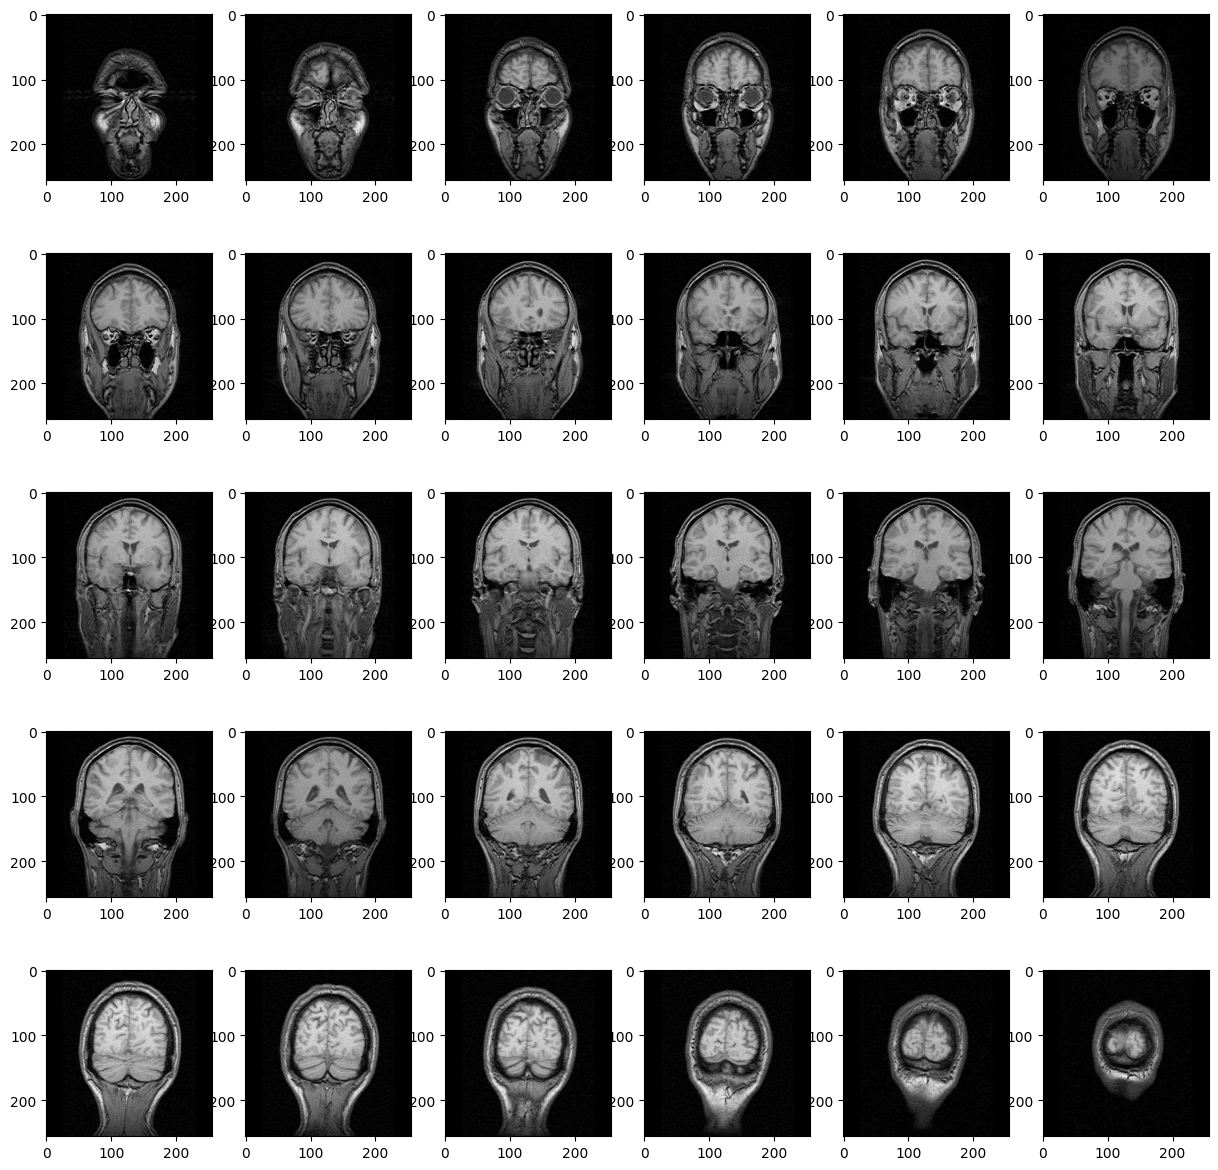

In [91]:
fig,axes= plt.subplots(5,6,figsize = (15,15))
slice_count = 0
for i in range(5):
  for j in range(6):
    axes[i][j].imshow(all_slices[slice_count], cmap="gray")
    slice_count +=1